In [25]:
from qcodes_contrib_drivers.drivers.Thorlabs.APT import Thorlabs_APT
import numpy as np
import matplotlib.pyplot as plt
from seabreeze.spectrometers import list_devices, Spectrometer
import time
import csv
import os

apt = Thorlabs_APT()

In [2]:
from qcodes_contrib_drivers.drivers.Thorlabs.K10CR1 import Thorlabs_K10CR1

inst = Thorlabs_K10CR1("K10CR1", 0, apt)

Connected to: Thorlabs K10CR1 (serial:55357574, firmware:SW Version 1.0.3) in 0.01s


In [3]:
devices = list_devices()
if devices:
    print("Available devices:", devices)
else:
    print("No devices available.")

Available devices: [<SeaBreezeDevice HR4000:HR4C222>]


In [4]:
# Move to zero and recalibrate
inst.move_home()

# Read position
print("Position:", inst.position())

Position: 0.0


In [5]:
spec = Spectrometer(devices[0])
# Set the exposure time 
exposure_time_micros = float(input("Enter the exposure time in microseconds: "))
spec.integration_time_micros(exposure_time_micros)

Enter the exposure time in microseconds: 100


# Without Accumulation.

Position: 155.0


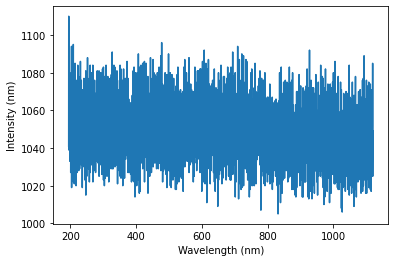

In [6]:
import time
import matplotlib.pyplot as plt
import csv

# Set target velocity to 10 deg/s
inst.velocity_max(10)

# Move to a specific angle and wait until it's finished
inst.position(155)
# Read position
print("Position:", inst.position())
time.sleep(0.5)
# Consider settling time to account for backlash from the motor

# Get wavelengths and intensities from the spectrometer
wavelengths = spec.wavelengths()
intensities = spec.intensities()

# Create a CSV file and write the data
csv_filename = 'spectrometer_data.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Wavelength (nm)', 'Intensity (nm)'])  # Write header
    for wavelength, intensity in zip(wavelengths, intensities):
        csv_writer.writerow([wavelength, intensity])

# Plot the data
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(wavelengths, intensities)

# Label the x and y axes
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Intensity (nm)')

plt.show()
time.sleep(1.0)

# With Accumulation

Position: 155.0


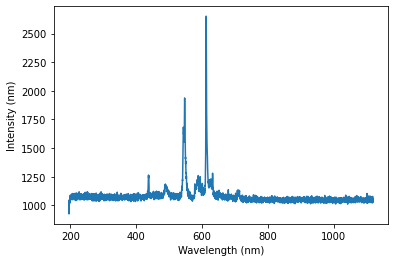

In [7]:
# Set target velocity to 10 deg/s
inst.velocity_max(10)

# Move to specific angle and wait until it's finished
inst.position(155)
# Read position
print("Position:", inst.position())
time.sleep(0.5)
#careful the backlash from the motor, need settling tim

fig = plt.figure()
ax = fig.add_subplot(111)

# Define the number of accumulations
num_accumulations = 5  

# Initialize lists to store wavelengths and intensities
wavelengths = []
intensity_sum = np.zeros(len(spec.wavelengths()))  # Initialize intensity_sum with zeros

# Perform accumulation
for _ in range(num_accumulations):
    # Get wavelengths and intensities from data (assuming they are in nanometers)
    current_wavelengths = spec.wavelengths()
    current_intensities = spec.intensities()
    
    
    # Accumulate intensities
    intensity_sum += current_intensities

# Calculate the average intensity
average_intensity = intensity_sum / num_accumulations

# Plot the average accumulation
ax.plot(current_wavelengths, average_intensity)

# Label the x and y axes
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Intensity (nm)')
time.sleep(1.0)

#  ACCUMULATION DATA SAVING SINGLE RUN

Position: 155.0


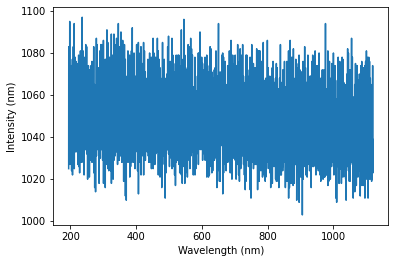

In [7]:
import time
import matplotlib.pyplot as plt
import csv

# Set target velocity to 10 deg/s
inst.velocity_max(10)

# Move to a specific angle and wait until it's finished
inst.position(155)
# Read position
print("Position:", inst.position())
time.sleep(0.5)
# Consider settling time to account for backlash from the motor

fig = plt.figure()
ax = fig.add_subplot(111)

# Define the number of accumulations
num_accumulations = 5

# Initialize lists to store wavelengths and intensities
wavelengths = []
intensities = [[] for _ in range(num_accumulations)]

# Perform accumulation
for i in range(num_accumulations):
    # Get wavelengths and intensities from data (assuming they are in nanometers)
    current_wavelengths = spec.wavelengths()
    current_intensities = spec.intensities()

    # Append the current wavelengths and intensities to the lists
    wavelengths.extend(current_wavelengths)
    intensities[i] = current_intensities

# Save the data to a CSV file
csv_filename = 'test.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    header = ['Wavelength (nm'] + [f'Intensity AC {i + 1}' for i in range(num_accumulations)]
    csv_writer.writerow(header)  # Write header

    for row in zip(wavelengths, *intensities):
        csv_writer.writerow(row)

# Plot the accumulation
# Plot only a subset of the data, e.g., the first accumulation
ax.plot(wavelengths[:len(current_wavelengths)], intensities[0])

# Label the x and y axes
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Intensity (nm)')

plt.show()
time.sleep(1.0)


Enter the initial angle in degrees: 250
Enter the step size in degrees: 10
Enter the final angle in degrees: 280
Enter number of accumulation: 5
Enter integration time in microseconds: 100
Position: 249.99998474121094 degrees at angle: 250.0 degrees


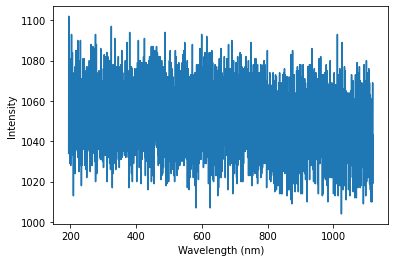

Position: 260.0000305175781 degrees at angle: 260.0 degrees


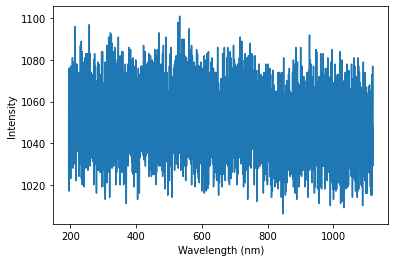

Position: 270.0 degrees at angle: 270.0 degrees


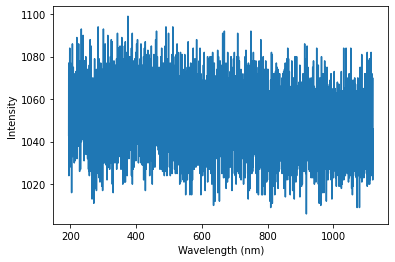

Position: 279.9999694824219 degrees at angle: 280.0 degrees


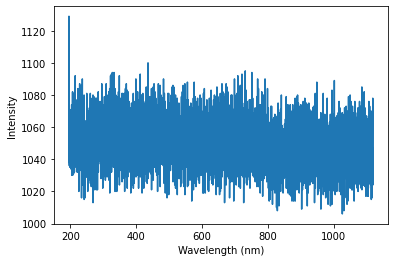

Final Position: 279.9999694824219 degrees


In [30]:
# Define the initial angle, step size, and final angle
# Input for initial angle, step size, and final angle
initial_angle = float(input("Enter the initial angle in degrees: "))
step_size = float(input("Enter the step size in degrees: "))
final_angle = float(input("Enter the final angle in degrees: "))

# Define the number of accumulations and integration time
num_accumulations = int(input("Enter number of accumulation: "))
exposure_time_micros = float(input("Enter integration time in microseconds: "))

# Set the time delay (in seconds)
delay_seconds = 5

# Set target velocity to 10 deg/s
inst.velocity_max(10)

# Initialize the current angle to the initial angle
current_angle = initial_angle

# Loop to move the position
while current_angle <= final_angle:
    # Move to the current angle and wait until it's finished
    inst.position(current_angle)
    
    # Read and print the current position
    current_position = inst.position()
    time.sleep(0.5)  # Pause the execution for 0.5 seconds
    print(f"Position: {current_position} degrees at angle: {current_angle} degrees")
    
    time.sleep(delay_seconds)  # Pause the execution for delay_seconds
    
    # Dynamically generate the CSV filename based on the current angle
    current_csv_filename = f'angle_{current_angle}_integrationtime_{exposure_time_micros}_acc_{num_accumulations}.csv'
    
    # Take reading on spectrometer 
    perform_accumulation(spec, num_accumulations, exposure_time_micros,current_csv_filename)    
    
    # Increment the current angle by the step size
    current_angle += step_size
    
# Ensure that the final angle is reached
inst.position(final_angle)

# Read and print the final position
final_position = inst.position()
print(f"Final Position: {final_position} degrees")


# Without CSV 

In [8]:
def perform_accumulation(spec, num_accumulations, exposure_time_micros):
    # Set integration time
    spec.integration_time_micros(exposure_time_micros)

    # Initialize lists to store wavelengths and intensities
    wavelengths = []
    intensities = [[] for _ in range(num_accumulations)]

    # Perform accumulation
    for _ in range(num_accumulations):
        # Get wavelengths and intensities from data (assuming they are in nanometers)
        current_wavelengths = spec.wavelengths()
        current_intensities = spec.intensities()
        
        # Accumulate intensities
        intensity_sum += current_intensities

    # Calculate the average intensity
    average_intensity = intensity_sum / num_accumulations

    # Plot the average accumulation
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(current_wavelengths, average_intensity)

    # Label the x and y axes
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel('Intensity')

    plt.show()
    time.sleep(1.0)


# WITH CSV

In [28]:
def perform_accumulation(spec, num_accumulations, exposure_time_micros, output_csv_filename):
    # Set integration time
    spec = Spectrometer(devices[0])
    spec.integration_time_micros(exposure_time_micros)

    # Initialize lists to store wavelengths and intensities
    wavelengths = []
    intensities = [[] for _ in range(num_accumulations)]  # Initialize intensity_sum with zeros

    # Perform accumulation
    for i in range(num_accumulations):
        # Get wavelengths and intensities from data (assuming they are in nanometers)
        current_wavelengths = spec.wavelengths()
        current_intensities = spec.intensities()

        # Append the current wavelengths and intensities to the lists
        wavelengths.extend(current_wavelengths)
        intensities[i] = current_intensities
        
    # Create the "data" folder if it doesn't exist
    data_folder = 'data'
    if not os.path.exists(data_folder):
        os.makedirs(data_folder)

    # Save the data to a CSV file in the "data" folder
    output_csv_filepath = os.path.join(data_folder, output_csv_filename)
    
    # Save the data to a CSV file
    with open(output_csv_filepath, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        header = ['Wavelength (nm'] + [f'Intensity AC {i + 1}' for i in range(num_accumulations)]
        csv_writer.writerow(header)  # Write header

        for row in zip(wavelengths, *intensities):
            csv_writer.writerow(row)

    # Plot the average accumulation
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(wavelengths[:len(current_wavelengths)], intensities[0])

    # Label the x and y axes
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel('Intensity')

    plt.show()
    time.sleep(1.0)
